In [ ]:
from pyspark.sql.functions import col, to_date, mean, count
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, DateType, StringType , BooleanType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pyspark.sql.functions as F

schemaDF = StructType([
    StructField("player_id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("pos", StringType(), True),
    StructField("age", DoubleType(), True),
    StructField("is_native", IntegerType(), True),
    StructField("start_date", DateType(), True),
    StructField("start_val", IntegerType(), True),
    StructField("last_date", DateType(), True),
    StructField("last_val", IntegerType(), True),
    StructField("total_goals", IntegerType(), True),
    StructField("total_assists", IntegerType(), True),
    StructField("yellow_cards", IntegerType(), True),
    StructField("red_cards", IntegerType(), True),
    StructField("minutes_played", DoubleType(), True),
    StructField("sum_minutes_played", IntegerType(), True),
    StructField("change", IntegerType(), True),
    StructField("cl_goals", IntegerType(), True),
    StructField("cl_assists", IntegerType(), True),
    StructField("cl_yc", IntegerType(), True),
    StructField("cl_rc", IntegerType(), True),
    StructField("cl_mins", DoubleType(), True),
    StructField("el_goals", IntegerType(), True),
    StructField("el_assists", IntegerType(), True),
    StructField("el_yc", IntegerType(), True),
    StructField("el_rc", IntegerType(), True),
    StructField("el_mins", DoubleType(), True)
])

# Получаем переменную columns для последующией регрессии
df = spark.read.csv("/user/student/BD/res_csv_2/IT1_26_30_Attack", header = True, schema = schemaDF)

remove_cols = ['player_id','name','pos','start_date',
               'last_date','last_val','age','change',]
columns = df.columns

for col in remove_cols:
    columns.remove(col)

columns

['is_native',
 'start_val',
 'total_goals',
 'total_assists',
 'yellow_cards',
 'red_cards',
 'minutes_played',
 'sum_minutes_played',
 'cl_goals',
 'cl_assists',
 'cl_yc',
 'cl_rc',
 'cl_mins',
 'el_goals',
 'el_assists',
 'el_yc',
 'el_rc',
 'el_mins']

In [ ]:
# Настраиваем необходимые параметры
passport = [("IT1", "Italy"), ("L1", "Germany"), ("RU1", "Russia"), ("GB1", "England"), ("ES1", "Spain"),
           ("FR1", "France"), ("TR1", "Turkey")]

age_groups = [(16, 20), (21, 25), (26, 30)]

positions = ["Attack", "Midfield"]

all_csv = {}

# Считываем все файлы из папки с CSV
for passport_id, country in passport:
    for position in positions:
        for age_min, age_max in age_groups:
            group_name = f"{passport_id}_{age_min}_{age_max}_{position}"
            exec(f"df_{group_name} = spark.read.csv('/user/student/BD/res_csv_2/{group_name}', header = True, schema = schemaDF)")
            exec(f"all_csv['{passport_id}_{age_min}_{position}'] = df_{group_name}")

# print(all_csv.keys())

dict_keys(['IT1_16_Attack', 'IT1_21_Attack', 'IT1_26_Attack', 'IT1_16_Midfield', 'IT1_21_Midfield', 'IT1_26_Midfield', 'L1_16_Attack', 'L1_21_Attack', 'L1_26_Attack', 'L1_16_Midfield', 'L1_21_Midfield', 'L1_26_Midfield', 'RU1_16_Attack', 'RU1_21_Attack', 'RU1_26_Attack', 'RU1_16_Midfield', 'RU1_21_Midfield', 'RU1_26_Midfield', 'GB1_16_Attack', 'GB1_21_Attack', 'GB1_26_Attack', 'GB1_16_Midfield', 'GB1_21_Midfield', 'GB1_26_Midfield', 'ES1_16_Attack', 'ES1_21_Attack', 'ES1_26_Attack', 'ES1_16_Midfield', 'ES1_21_Midfield', 'ES1_26_Midfield', 'FR1_16_Attack', 'FR1_21_Attack', 'FR1_26_Attack', 'FR1_16_Midfield', 'FR1_21_Midfield', 'FR1_26_Midfield', 'TR1_16_Attack', 'TR1_21_Attack', 'TR1_26_Attack', 'TR1_16_Midfield', 'TR1_21_Midfield', 'TR1_26_Midfield'])


2024-06-27 13:27:56,536 WARN util.Instrumentation: [246c1f8c] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:27:58,264 WARN netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
2024-06-27 13:27:58,264 WARN netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
2024-06-27 13:27:58,362 WARN netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
2024-06-27 13:27:58,362 WARN netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK
2024-06-27 13:27:58,399 WARN util.Instrumentation: [246c1f8c] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:27:59,851 WARN util.Instrumentation: [645e5a5f] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:01,210 WARN util.Instrumentation: [645e5a5f] Cholesky solver failed due 

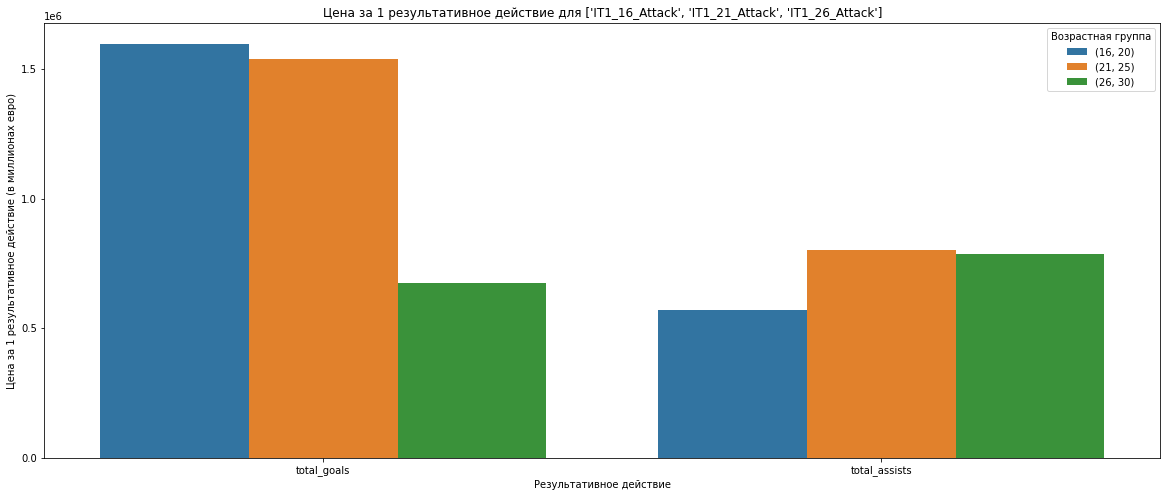

2024-06-27 13:28:04,372 WARN util.Instrumentation: [f8161df5] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:04,593 WARN util.Instrumentation: [f8161df5] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:04,989 WARN util.Instrumentation: [c401eb7b] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:06,168 WARN util.Instrumentation: [c401eb7b] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:07,017 WARN util.Instrumentation: [7a780b50] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:08,136 WARN util.Instrumentation: [7a780b50] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


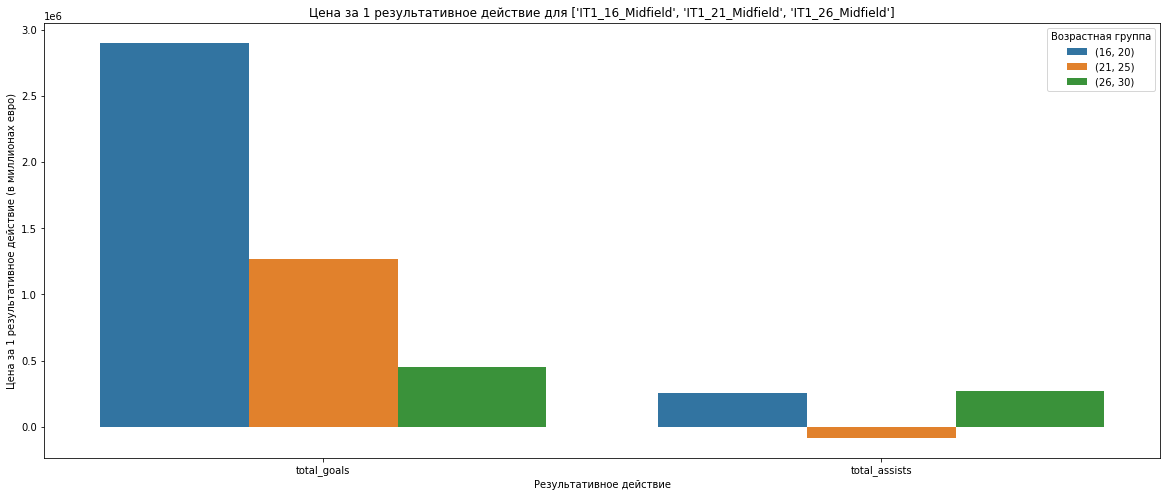

2024-06-27 13:28:09,355 WARN util.Instrumentation: [95cfcc51] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:09,680 WARN util.Instrumentation: [95cfcc51] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:10,097 WARN util.Instrumentation: [96211a46] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:10,945 WARN util.Instrumentation: [96211a46] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:11,739 WARN util.Instrumentation: [33c66564] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:12,881 WARN util.Instrumentation: [33c66564] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


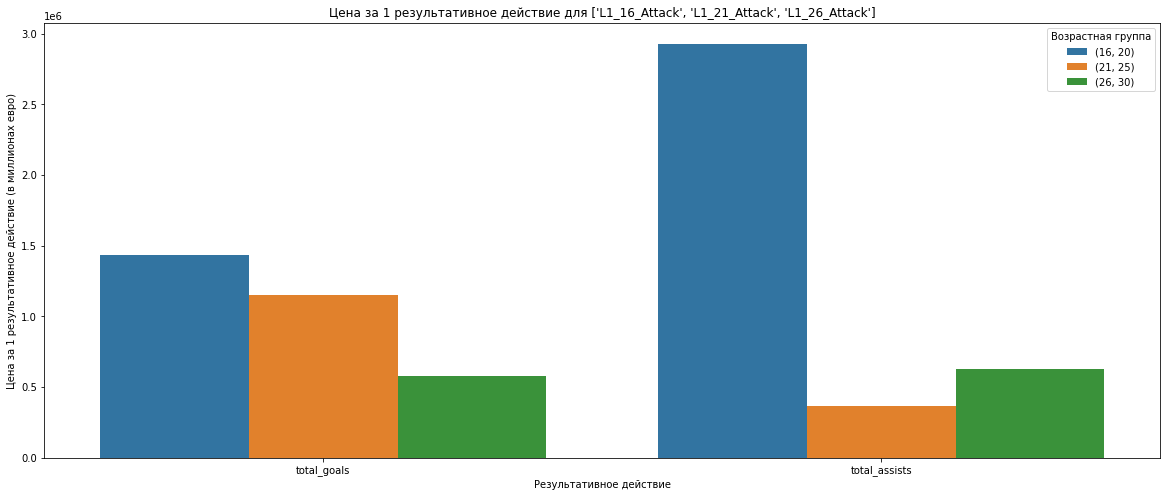

2024-06-27 13:28:13,746 WARN util.Instrumentation: [f2fe9d46] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:14,031 WARN util.Instrumentation: [f2fe9d46] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:14,334 WARN util.Instrumentation: [15416575] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:15,908 WARN util.Instrumentation: [d8eeb19a] regParam is zero, which might cause numerical instability and overfitting.


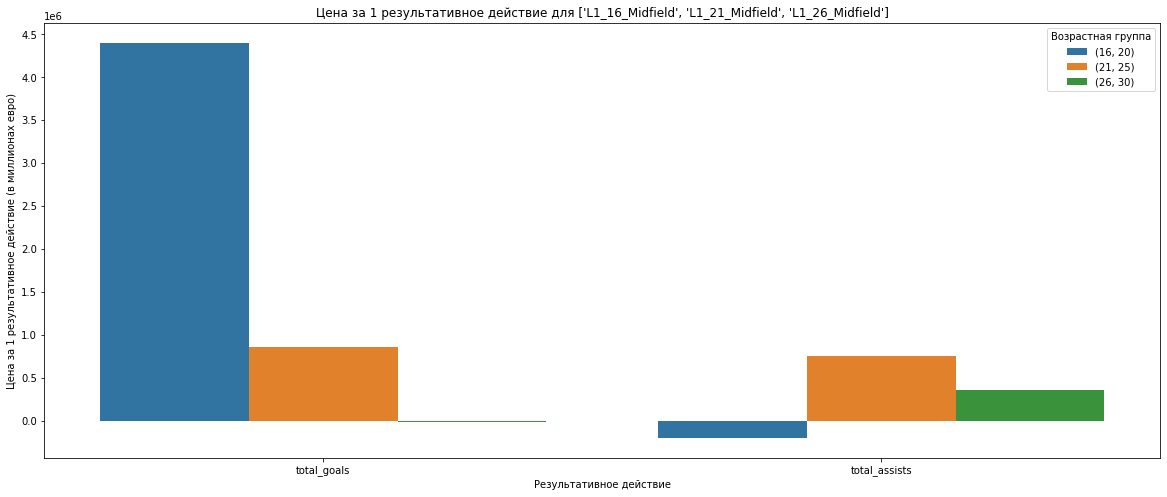

2024-06-27 13:28:17,584 WARN util.Instrumentation: [a48e8d5b] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:17,891 WARN util.Instrumentation: [a48e8d5b] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:18,206 WARN util.Instrumentation: [e1b35e8d] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:19,249 WARN util.Instrumentation: [e1b35e8d] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:20,021 WARN util.Instrumentation: [73e90955] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:20,860 WARN util.Instrumentation: [73e90955] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


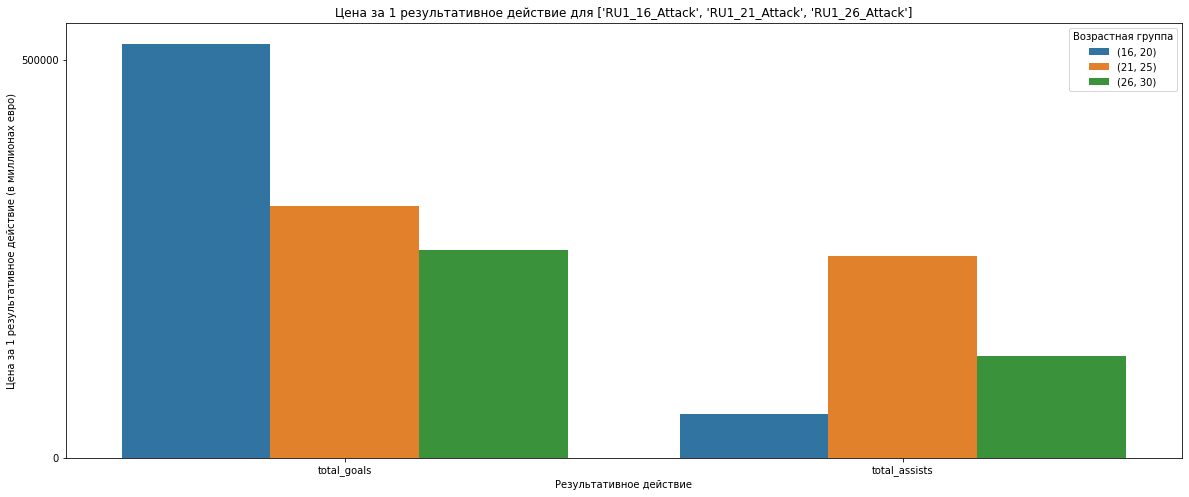

2024-06-27 13:28:21,496 WARN util.Instrumentation: [7831e162] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:21,694 WARN util.Instrumentation: [7831e162] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:21,974 WARN util.Instrumentation: [b1b23577] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:23,145 WARN util.Instrumentation: [b1b23577] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:23,745 WARN util.Instrumentation: [b93a34b8] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:24,490 WARN util.Instrumentation: [b93a34b8] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


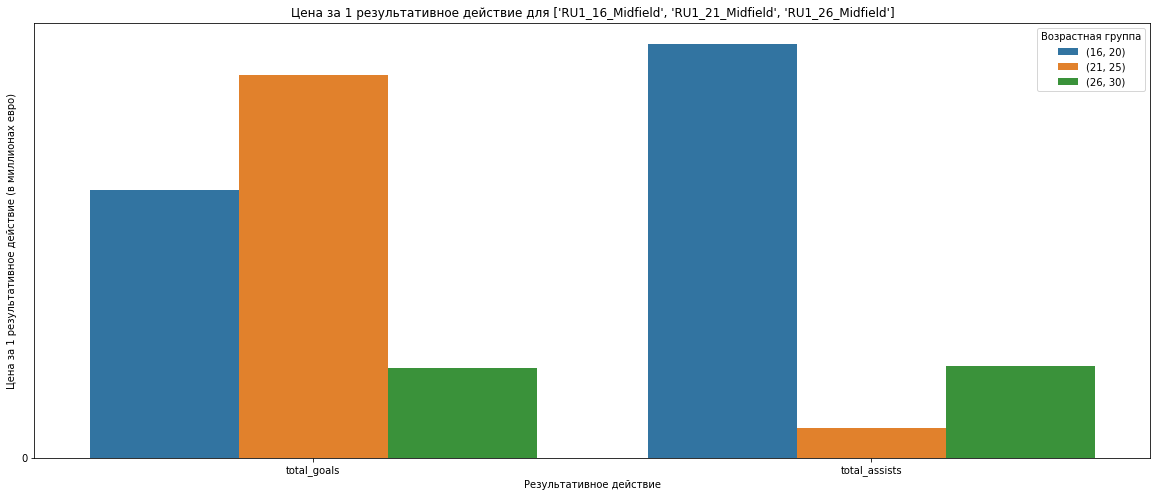

2024-06-27 13:28:25,296 WARN util.Instrumentation: [ded5be55] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:25,447 WARN util.Instrumentation: [ded5be55] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:25,697 WARN util.Instrumentation: [a4ca3a9f] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:26,639 WARN util.Instrumentation: [a4ca3a9f] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:27,495 WARN util.Instrumentation: [c277538a] regParam is zero, which might cause numerical instability and overfitting.


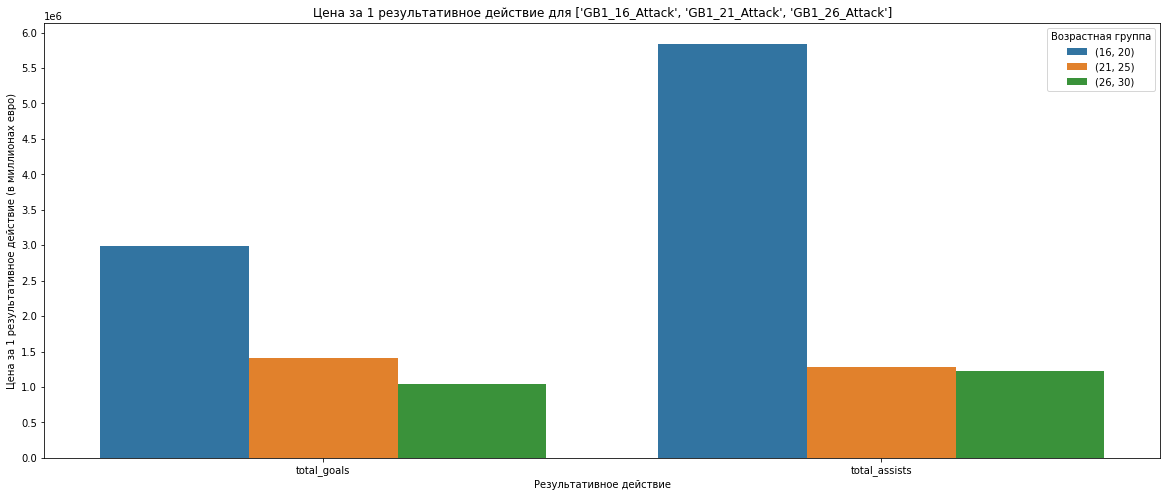

2024-06-27 13:28:29,316 WARN util.Instrumentation: [46d236e7] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:29,473 WARN util.Instrumentation: [46d236e7] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:29,762 WARN util.Instrumentation: [982e0b17] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:30,568 WARN util.Instrumentation: [982e0b17] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:31,042 WARN util.Instrumentation: [8a065eba] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:31,957 WARN util.Instrumentation: [8a065eba] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


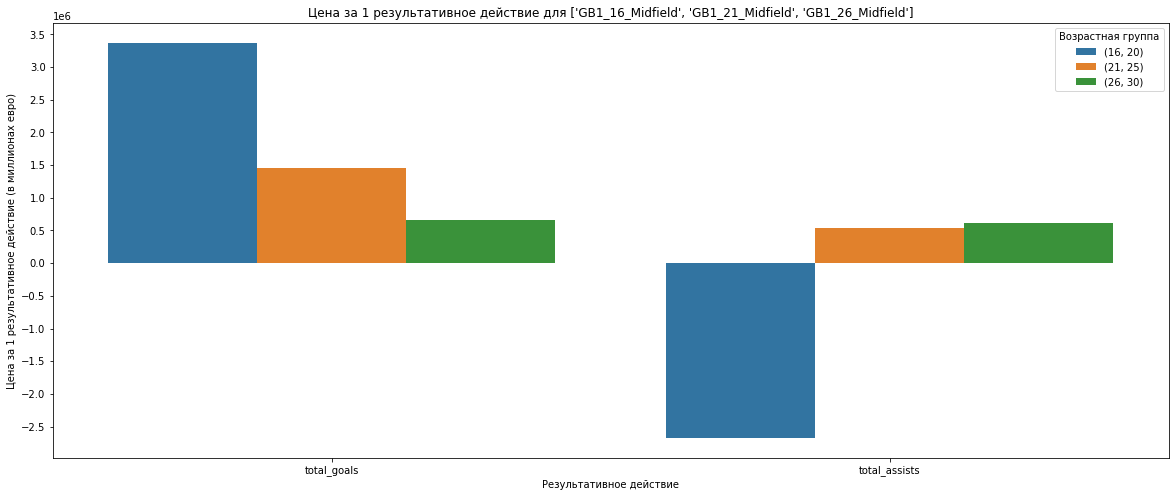

2024-06-27 13:28:32,809 WARN util.Instrumentation: [8553b77f] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:33,060 WARN util.Instrumentation: [8553b77f] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:33,339 WARN util.Instrumentation: [250f0438] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:34,263 WARN util.Instrumentation: [250f0438] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:34,812 WARN util.Instrumentation: [4d27535d] regParam is zero, which might cause numerical instability and overfitting.


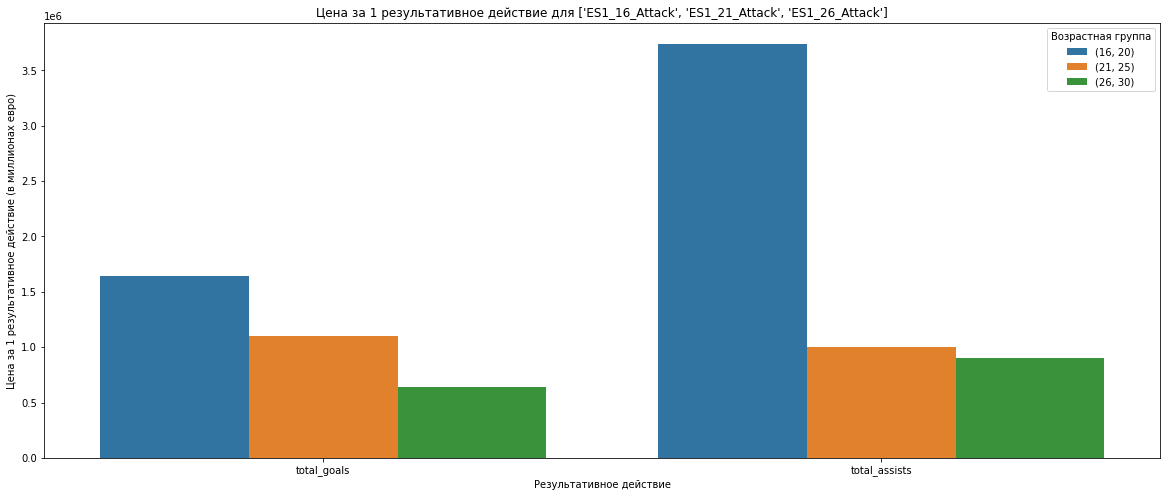

2024-06-27 13:28:36,534 WARN util.Instrumentation: [d6673fa0] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:36,652 WARN util.Instrumentation: [d6673fa0] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:36,929 WARN util.Instrumentation: [754c9d1b] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:37,833 WARN util.Instrumentation: [754c9d1b] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:38,395 WARN util.Instrumentation: [5a1aa233] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:39,390 WARN util.Instrumentation: [5a1aa233] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


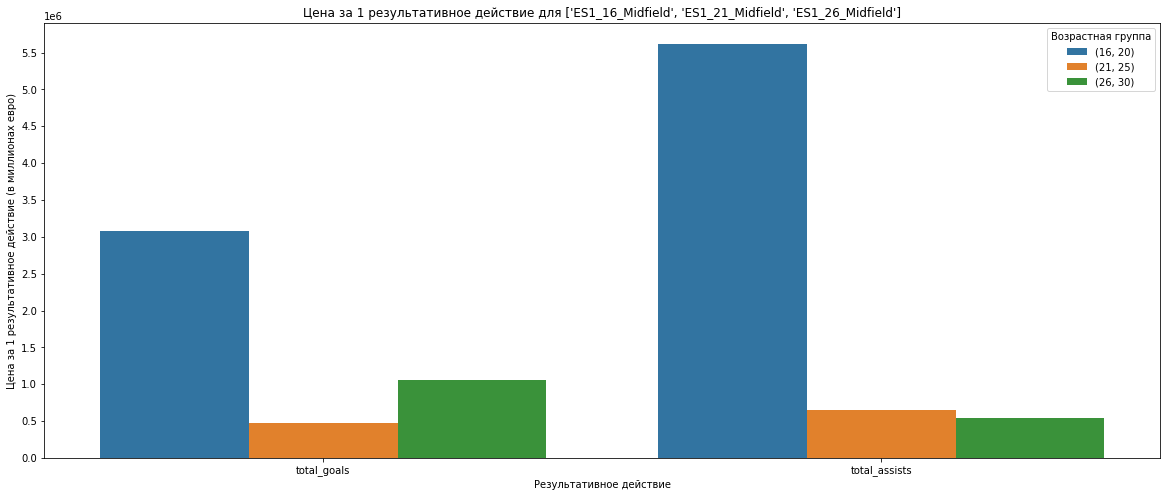

2024-06-27 13:28:40,182 WARN util.Instrumentation: [13c448a2] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:40,456 WARN util.Instrumentation: [13c448a2] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:40,749 WARN util.Instrumentation: [8f539b8e] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:41,768 WARN util.Instrumentation: [8f539b8e] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:42,280 WARN util.Instrumentation: [84edfc21] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:43,178 WARN util.Instrumentation: [84edfc21] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


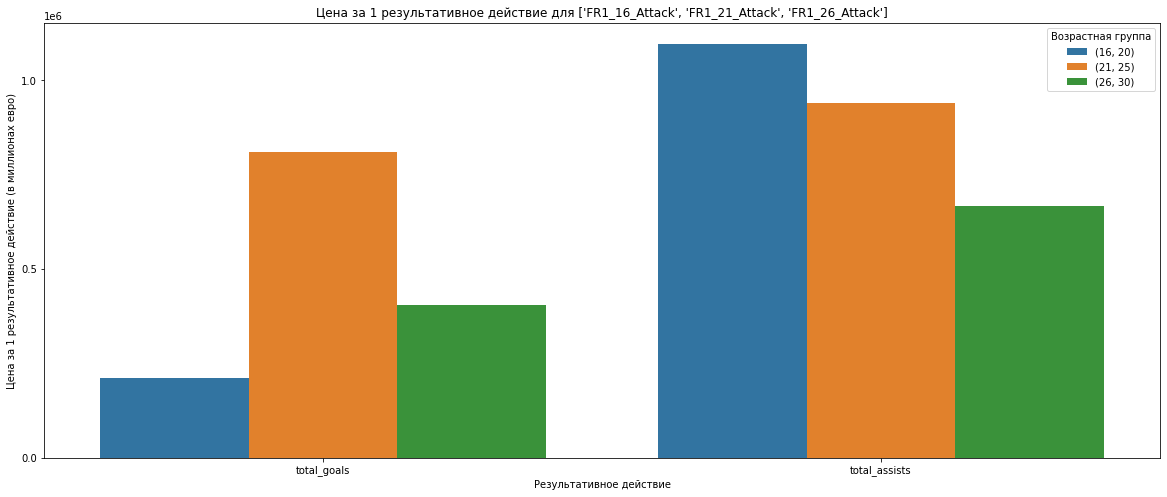

2024-06-27 13:28:43,920 WARN util.Instrumentation: [d9aa02cb] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:44,251 WARN util.Instrumentation: [d9aa02cb] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:44,590 WARN util.Instrumentation: [56979dd4] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:45,749 WARN util.Instrumentation: [56979dd4] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:46,364 WARN util.Instrumentation: [543846ab] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:47,103 WARN util.Instrumentation: [543846ab] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


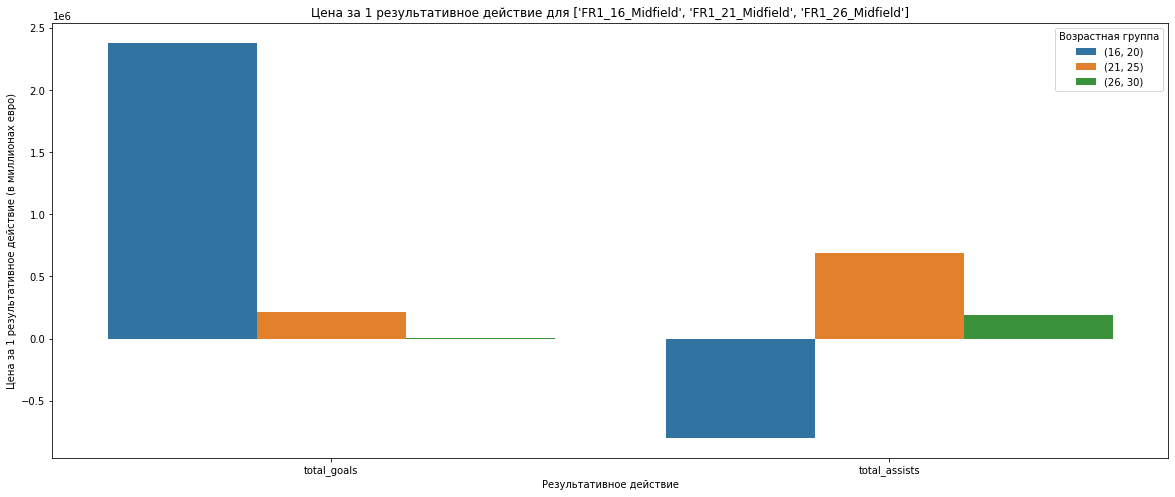

2024-06-27 13:28:47,875 WARN util.Instrumentation: [0ad40159] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:48,069 WARN util.Instrumentation: [0ad40159] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:48,338 WARN util.Instrumentation: [348b952b] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:49,071 WARN util.Instrumentation: [348b952b] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:49,518 WARN util.Instrumentation: [b936a8be] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:50,541 WARN util.Instrumentation: [b936a8be] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


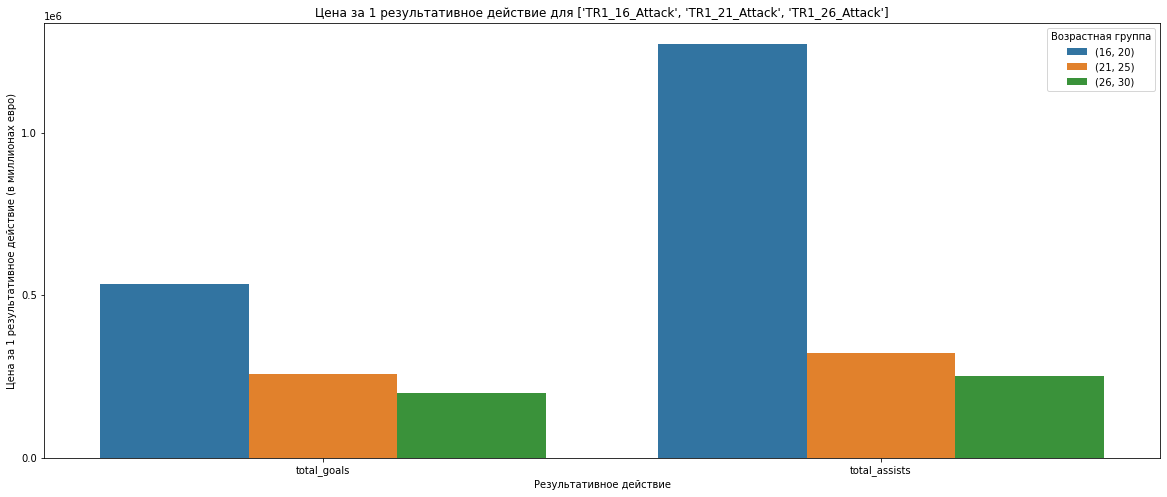

2024-06-27 13:28:51,348 WARN util.Instrumentation: [4d8a584d] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:51,578 WARN util.Instrumentation: [4d8a584d] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:51,874 WARN util.Instrumentation: [0a2e671d] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:52,617 WARN util.Instrumentation: [0a2e671d] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:53,169 WARN util.Instrumentation: [9b2803e1] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:54,337 WARN util.Instrumentation: [9b2803e1] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


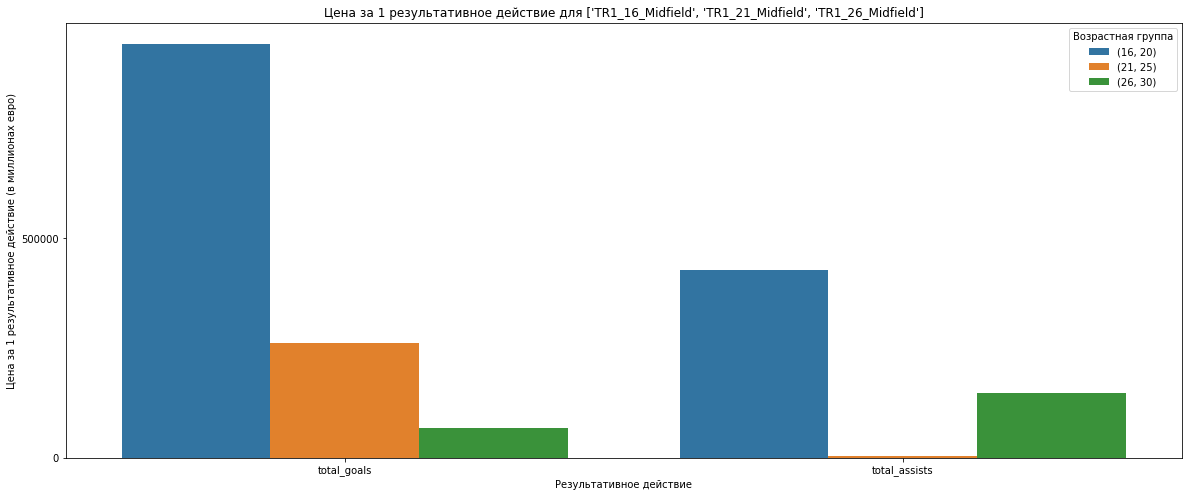

In [ ]:
# Строим графики по возростам
keys = list(all_csv.keys())
R = []

# Цикл с шагом 3
for i in range(0, len(keys), 3):
    # Получение трех значений за итерацию
    chunk = keys[i:i+3]

    # Присваивание переменных
    all_dfs = [all_csv.get(key) for key in chunk if key in all_csv]

    age_groups = [(16, 20), (21, 25), (26, 30)]
    output_metrics = ['total_goals', 'total_assists']

    results = []

    for df, age_group in zip(all_dfs, age_groups):
        assembler = VectorAssembler(inputCols=columns, outputCol="features")
        transformData = assembler.transform(df)

        lr = LinearRegression(labelCol="change")
        modelLR = lr.fit(transformData)
        coefficients = modelLR.coefficients
        features = dict(zip(columns, coefficients))

        metric_values = {}
        for metric in output_metrics:
            metric_values[metric] = features[metric]

        for metric, value in metric_values.items():
            results.append({'age_group': age_group, 'metric': metric, 'value': value})

    # Преобразуем результаты в DataFrame
    results_df = pd.DataFrame(results)
    # print(results)

    # Построение столбчатой диаграммы
    plt.figure(figsize=(20, 8))
    sns.barplot(data=results_df, x='metric', y='value', hue='age_group')
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
    plt.xlabel('Результативное действие')
    plt.ylabel('Цена за 1 результативное действие (в миллионах евро)')
    plt.title(f'Цена за 1 результативное действие для {chunk}')
    plt.legend(title='Возрастная группа')
    plt.show()


In [ ]:
# Аналогично предыдущему разу, но не убираем поле с возрастом
remove_cols = ['player_id','name','pos','start_date',
               'last_date','last_val','change',]
columns = df.columns

for col in remove_cols:
    columns.remove(col)

2024-06-27 13:28:55,406 WARN util.Instrumentation: [c8d0f642] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:56,143 WARN util.Instrumentation: [c8d0f642] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:28:57,066 WARN util.Instrumentation: [95c84a93] regParam is zero, which might cause numerical instability and overfitting.


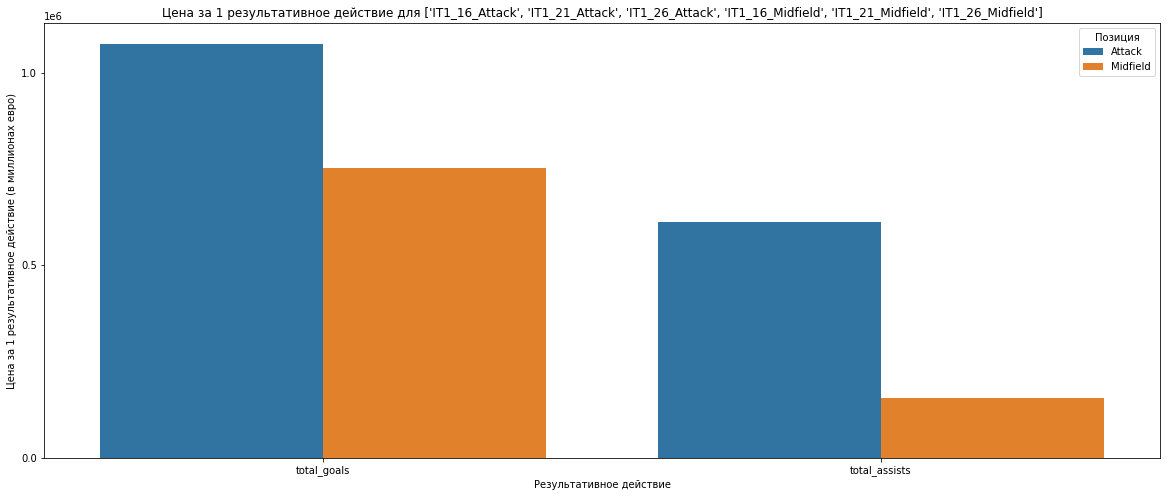

2024-06-27 13:28:58,884 WARN util.Instrumentation: [91be539f] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:28:59,559 WARN util.Instrumentation: [91be539f] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:29:00,940 WARN util.Instrumentation: [d6ef7181] regParam is zero, which might cause numerical instability and overfitting.


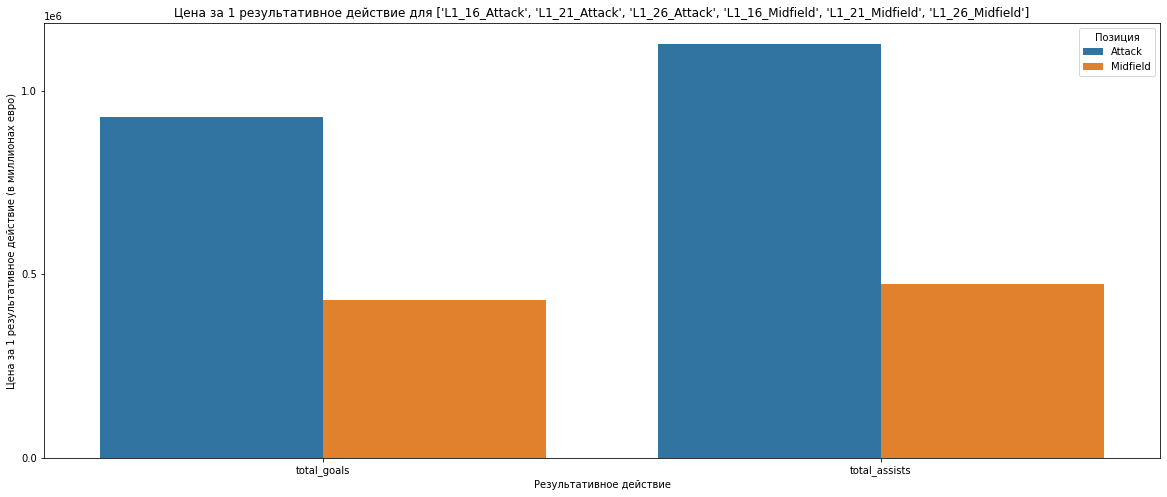

2024-06-27 13:29:02,834 WARN util.Instrumentation: [aaefeb23] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:03,467 WARN util.Instrumentation: [aaefeb23] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:29:04,356 WARN util.Instrumentation: [42e2c5d5] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:04,978 WARN util.Instrumentation: [42e2c5d5] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


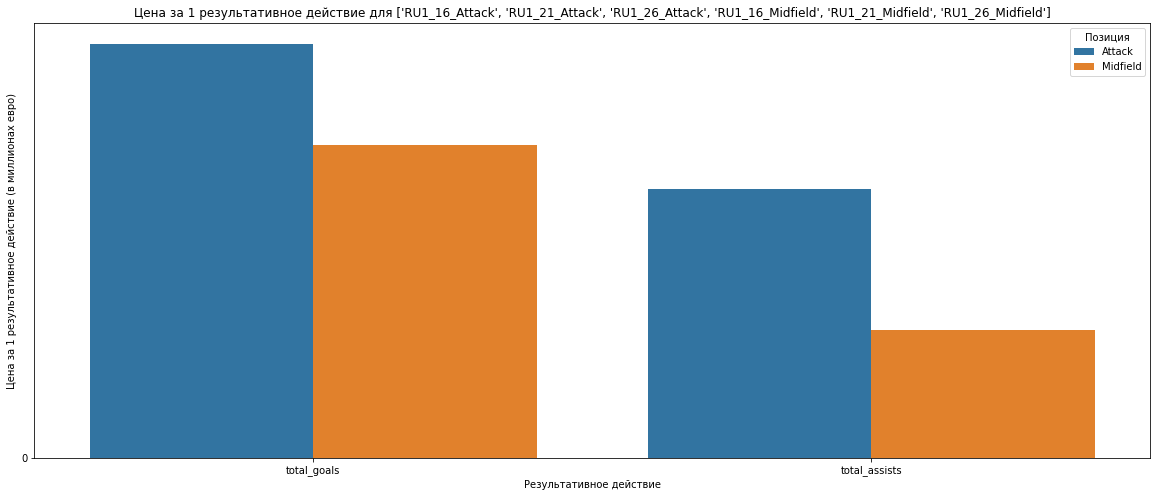

2024-06-27 13:29:06,115 WARN util.Instrumentation: [623195b0] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:07,756 WARN util.Instrumentation: [60087da6] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:08,478 WARN util.Instrumentation: [60087da6] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


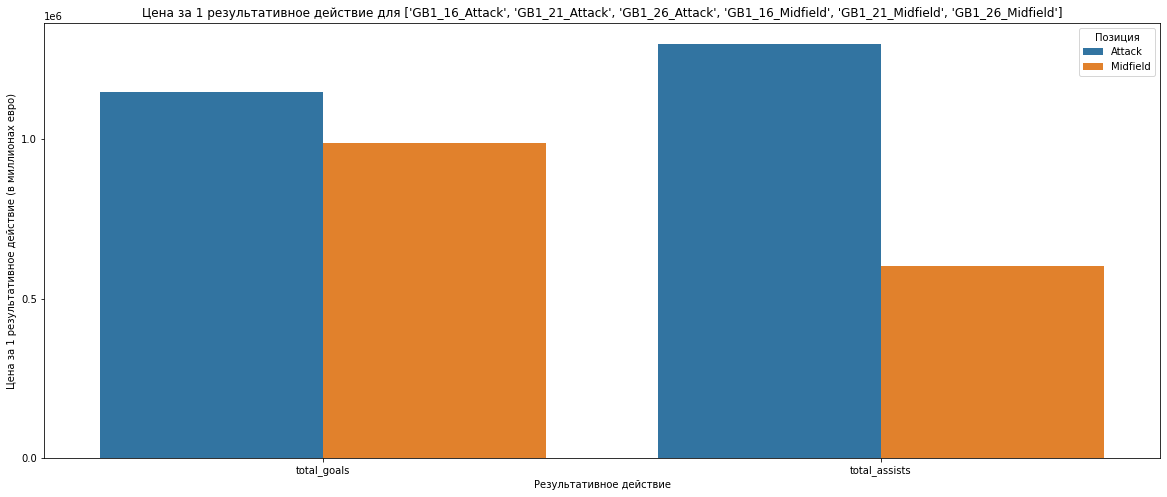

2024-06-27 13:29:09,751 WARN util.Instrumentation: [6de3757e] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:11,236 WARN util.Instrumentation: [35f6274c] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:11,729 WARN util.Instrumentation: [35f6274c] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


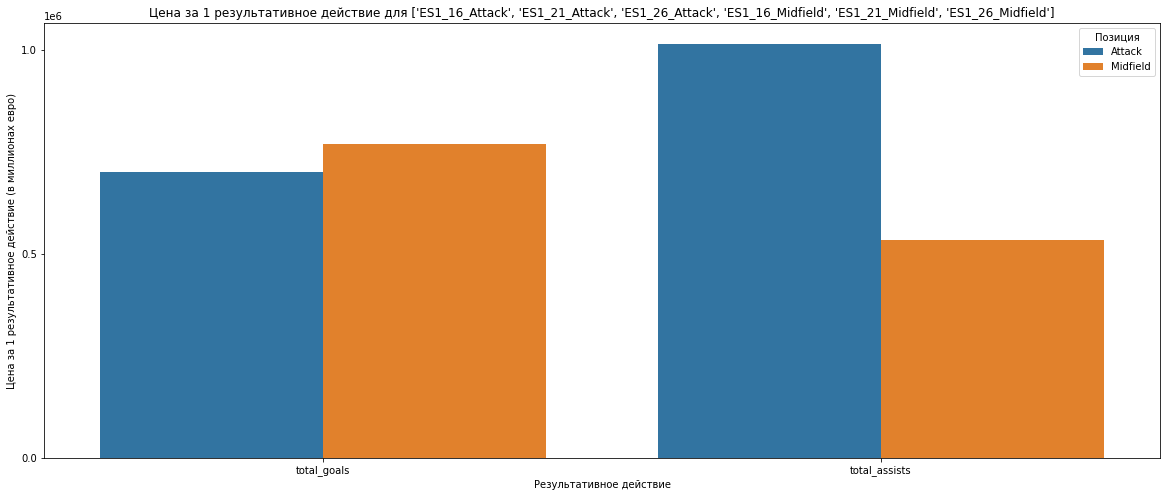

2024-06-27 13:29:12,761 WARN util.Instrumentation: [e9f287b7] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:13,423 WARN util.Instrumentation: [e9f287b7] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:29:14,288 WARN util.Instrumentation: [fe9a5bb4] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:15,062 WARN util.Instrumentation: [fe9a5bb4] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


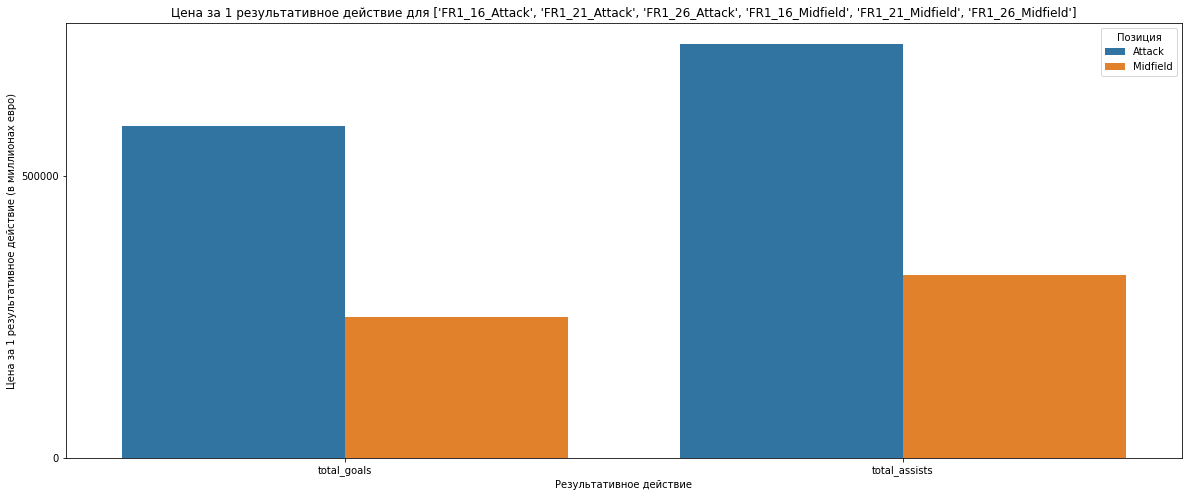

2024-06-27 13:29:16,174 WARN util.Instrumentation: [33ed5a8f] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:16,631 WARN util.Instrumentation: [33ed5a8f] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:29:17,465 WARN util.Instrumentation: [50615f1f] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:17,970 WARN util.Instrumentation: [50615f1f] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


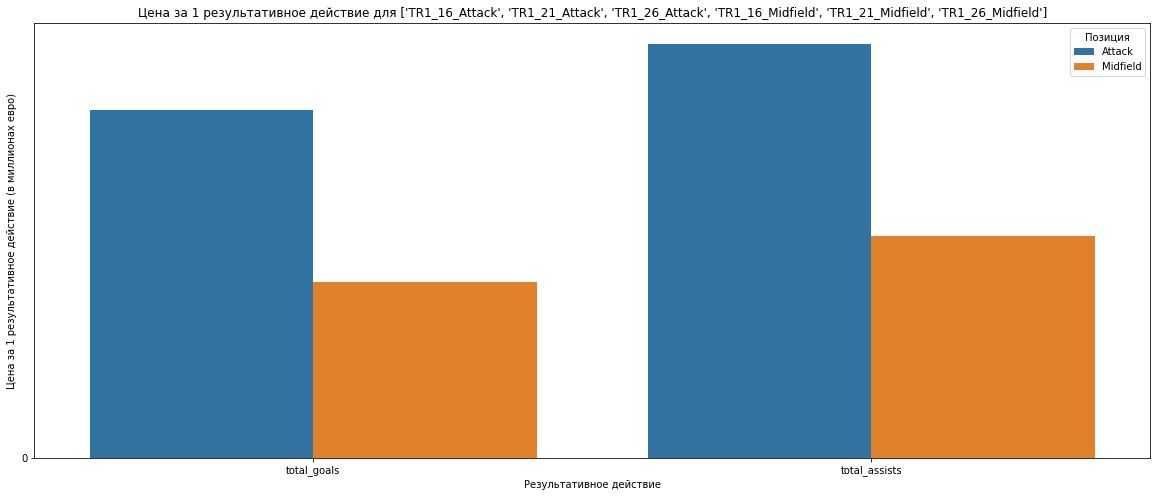

In [ ]:
# Строим графики по позициям
keys = list(all_csv.keys())

marks = ['IT1_Attack', 'IT1_Midfield', 'L1_Attack', 'L1_Midfield','RU1_Attack', 'RU1_Midfield',
            'GB1_Attack', 'GB1_Midfield','ES1_Attack', 'ES1_Midfield','FR1_Attack', 'FR1_Midfield',
            'TR1_Attack', 'TR1_Midfield']
R = []


# Цикл с шагом 3
for i in range(0, len(keys), 6):
    chunk = keys[i:i+6]

    # Присваивание переменных
    union_df_attack = all_csv[chunk[0]].union(all_csv[chunk[1]]).union(all_csv[chunk[2]])
    union_df_midfield = all_csv[chunk[3]].union(all_csv[chunk[4]]).union(all_csv[chunk[5]])

    all_dfs = [union_df_attack, union_df_midfield]
    position_list = ['Attack', 'Midfield']

    output_metrics = ['total_goals', 'total_assists']

    results = []

    j = 0

    for df, pos in zip(all_dfs, position_list):

        #print(f"--------------{chunk}----------------------")
        #print(f"Working with {chunk[j]}\n")
        j += 1

        assembler = VectorAssembler(inputCols=columns, outputCol="features")
        transformData = assembler.transform(df)

        lr = LinearRegression(labelCol="change")
        #train, test = transformData.randomSplit([0.8, 0.2])

        modelLR = lr.fit(transformData)
        coefficients = modelLR.coefficients
        features = dict(zip(columns, coefficients))

        metric_values = {}
        for metric in output_metrics:
            metric_values[metric] = features[metric]

        for metric, value in metric_values.items():
            results.append({'position_list': pos, 'metric': metric, 'value': value})

    # Преобразуем результаты в DataFrame
    results_df = pd.DataFrame(results)
    #print(results)

    # Построение столбчатой диаграммы
    plt.figure(figsize=(20, 8))
    sns.barplot(data=results_df, x='metric', y='value', hue='position_list')
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
    plt.xlabel('Результативное действие')
    plt.ylabel('Цена за 1 результативное действие (в миллионах евро)')
    plt.title(f'Цена за 1 результативное действие для {chunk}')
    plt.legend(title='Позиция')
    plt.show()

2024-06-27 13:29:19,144 WARN util.Instrumentation: [f70b96e6] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:21,734 WARN util.Instrumentation: [f7a5e1d8] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:24,610 WARN util.Instrumentation: [43509cda] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:25,589 WARN util.Instrumentation: [43509cda] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
2024-06-27 13:29:26,945 WARN util.Instrumentation: [4df6e483] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:29,400 WARN util.Instrumentation: [ac0c45a8] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:31,933 WARN util.Instrumentation: [d87521d4] regParam is zero, which might cause numerical instability and overfitting.
2024-06-27 13:29:34,969

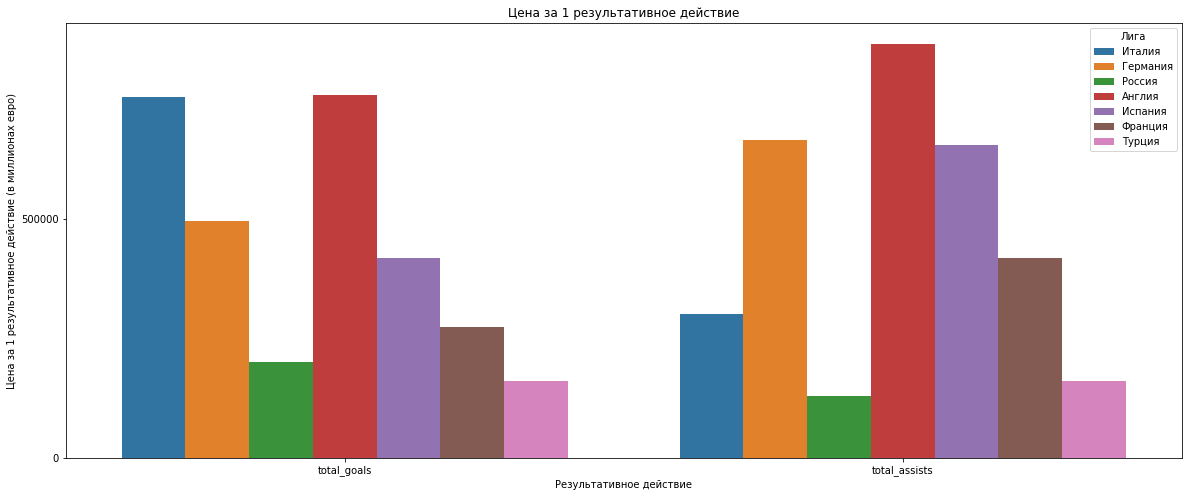

In [ ]:
# Строим графики по лигам
keys = list(all_csv.keys())
marks = ['IT1', 'L1', 'RU1', 'GB1', 'ES1', 'FR1', 'TR1']
league_name = ["Италия", "Германия", "Россия", "Англия", "Испания", "Франция", "Турция"]

R = []
all_dfs = []

# Цикл с шагом 3
for i in range(0, len(keys), 6):
    chunk = keys[i:i+6]

    # Присваивание переменных
    union_df = all_csv[chunk[0]].union(all_csv[chunk[1]]).union(all_csv[chunk[2]]).union(all_csv[chunk[3]]) \
    .union(all_csv[chunk[4]]).union(all_csv[chunk[5]])
    all_dfs.append(union_df)

    output_metrics = ['total_goals', 'total_assists']

results = []

for df, league in zip(all_dfs, league_name):

    #print(f"------------------{league}----------------------")
    assembler = VectorAssembler(inputCols=columns, outputCol="features")
    transformData = assembler.transform(df)

    lr = LinearRegression(labelCol="change")

    modelLR = lr.fit(transformData)
    coefficients = modelLR.coefficients
    features = dict(zip(columns, coefficients))


#     r2 = modelLR.summary.r2
#     print(f"{league}Коэффициент детерминации (R²): {r2}")
#     R.append(r2)
#     # Вычисление корреляции между каждым признаком и целевой переменной
#     correlations = {}
#     for col in columns:
#         corr = df.stat.corr(col, "change")
#         correlations[col] = corr
#         print(f"Корреляция между {col} и change: {corr}")

#     # Корреляционная матрица
#     correlation_matrix = df.select(columns).toPandas().corr()
#     print("Корреляционная матрица:")
#     print(correlation_matrix)

    metric_values = {}
    for metric in output_metrics:
        metric_values[metric] = features[metric]

    for metric, value in metric_values.items():
        results.append({'league': league, 'metric': metric, 'value': value})

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)
#print(results)

# Построение столбчатой диаграммы
plt.figure(figsize=(20, 8))
sns.barplot(data=results_df, x='metric', y='value', hue='league')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.xlabel('Результативное действие')
plt.ylabel('Цена за 1 результативное действие (в миллионах евро)')
plt.title(f'Цена за 1 результативное действие')
plt.legend(title='Лига')
plt.show()

#R2 = dict(zip(all_csv.keys(), R))
#print(R2)

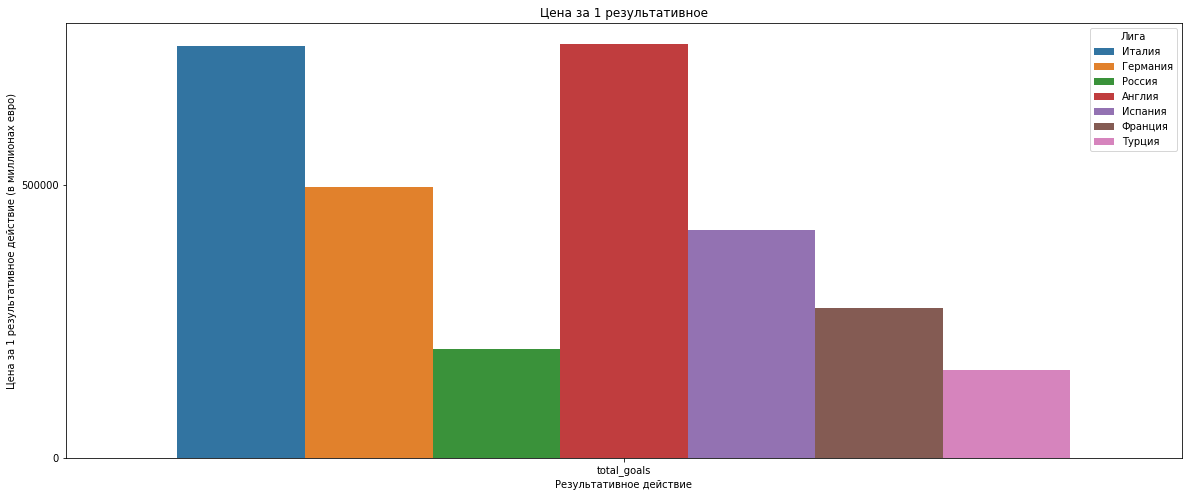

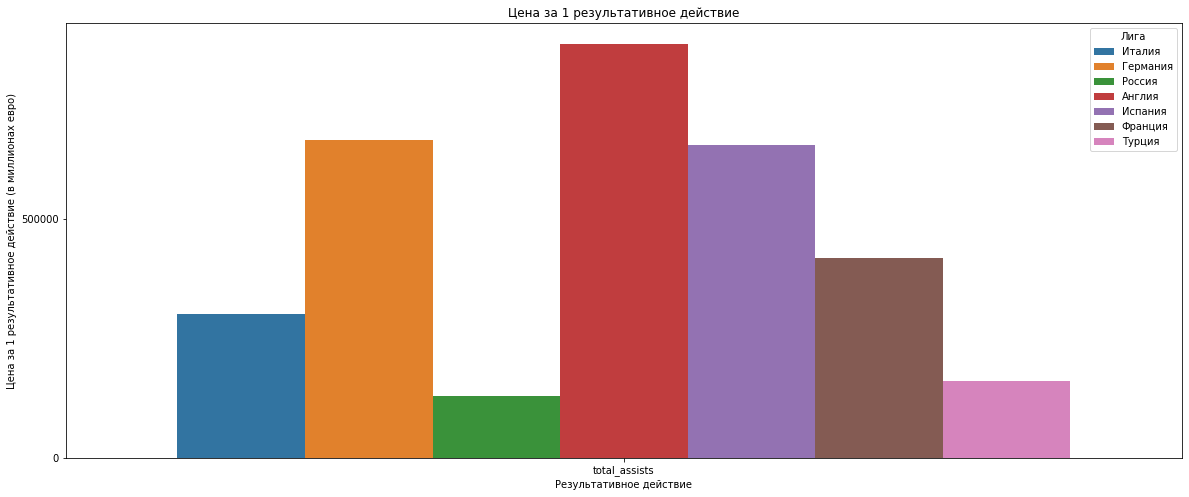

In [ ]:
res_goals = results_df.where(results_df.metric == "total_goals").dropna()
res_assists = results_df.where(results_df.metric == "total_assists").dropna()
res_cards = results_df.where(results_df.metric == "yellow_cards").dropna()



plt.figure(figsize=(20, 8))
sns.barplot(data=res_goals, x='metric', y='value', hue='league')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.xlabel('Результативное действие')
plt.ylabel('Цена за 1 результативное действие (в миллионах евро)')
plt.title(f'Цена за 1 результативное')
plt.legend(title='Лига')
plt.show()


plt.figure(figsize=(20, 8))
sns.barplot(data=res_assists, x='metric', y='value', hue='league')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.xlabel('Результативное действие')
plt.ylabel('Цена за 1 результативное действие (в миллионах евро)')
plt.title(f'Цена за 1 результативное действие')
plt.legend(title='Лига')
plt.show()